In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #Evaluates the quality of clusters in your data.
from mpl_toolkits.mplot3d import Axes3D  #Create 3D visualizations to better understand the relationships between different features in your dataset.
import warnings
warnings.filterwarnings("ignore")

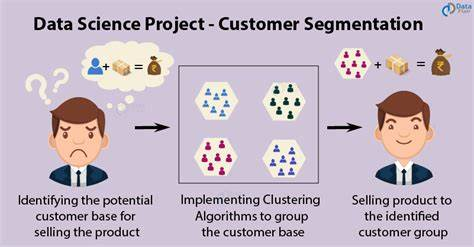

In [2]:
from IPython.display import Image,display,HTML
display(HTML("<h2> Mall Customer Segmentation </h2>"))
display(Image("images/Mall Customer Segmentation.jpg", width=800, height=300, retina=False))

#### Basic Info of the Dataset

In [3]:
df = pd.read_csv("data/Mall_Customers (2).csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape #200--> Columns, 5 --> Rows

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Checking for NUll values in the dataset
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**There are no null values in this dataset**

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Statistical Operations On Dataset**

In [9]:
#Descriptive Statistics
mean_score = df['Spending Score (1-100)'].mean()
median_score = df['Spending Score (1-100)'].median()
std_score = df['Spending Score (1-100)'].std()
var_score = df['Spending Score (1-100)'].var()

In [10]:
mean_score , median_score

(50.2, 50.0)

In [11]:
std_score , var_score

(25.823521668370162, 666.8542713567833)

**More Operations**

In [12]:
#Counting how many males and females
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [13]:
#For Array Operations
age_array = df['Age'].values
income_array = df['Annual Income (k$)'].values
spending_array = df['Spending Score (1-100)'].values
age_income_sum = np.add(age_array, income_array)

In [14]:
age_array[:10]

array([19, 21, 20, 23, 31, 22, 35, 23, 64, 30], dtype=int64)

In [15]:
age_income_sum[:10]

array([34, 36, 36, 39, 48, 39, 53, 41, 83, 49], dtype=int64)

In [16]:
high_spenders = df[df['Spending Score (1-100)'] > 80]
high_spenders.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
7,8,Female,23,18,94
11,12,Female,35,19,99
19,20,Female,35,23,98
25,26,Male,29,28,82


In [17]:
sample_df = df.sample(n=10)
sample_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
40,41,Female,65,38,35
129,130,Male,38,71,75
107,108,Male,54,63,46
17,18,Male,20,21,66
144,145,Male,25,77,12
104,105,Male,49,62,56
10,11,Male,67,19,14
169,170,Male,32,87,63
142,143,Female,28,76,40
72,73,Female,60,50,49


### Converting Categorical Into Numerical 

- It's generally a good practice to convert categorical columns into numerical values before data visualization, especially when you're working with machine learning models. This ensures that all features are in a consistent format and can be easily interpreted by the visualization tools.

In [18]:
# Encode categorical features
categorical_list = [x for x in df.columns if df[x].dtype =='object']
categorical_list

['Gender']

In [19]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [20]:
df['Gender'].head()

0    0
1    0
2    1
3    1
4    1
Name: Gender, dtype: int64

In [21]:
df["Gender"].dtype

dtype('int64')

### Data Visualization

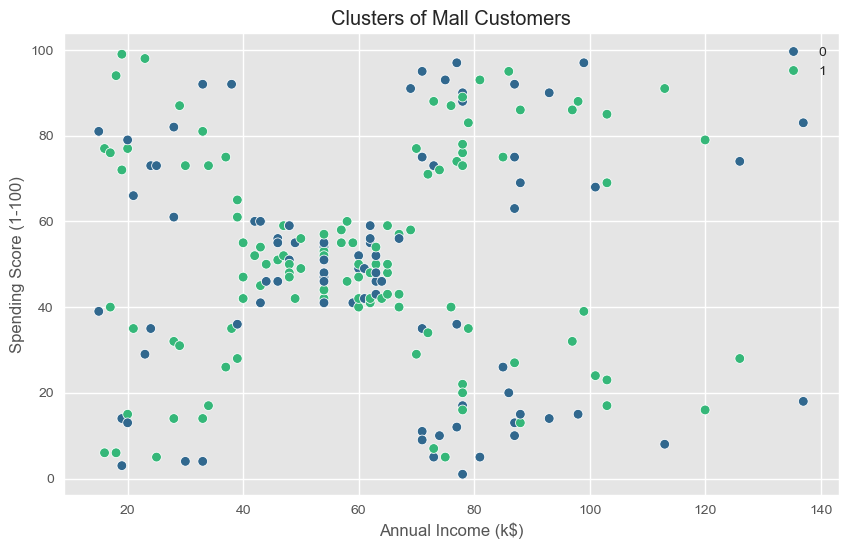

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid') 
plt.style.use("seaborn-v0_8")
plt.style.use('ggplot')


# Scatter plot for Annual Income (k$) vs Spending Score (1-100)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='viridis')
plt.title('Clusters of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show();

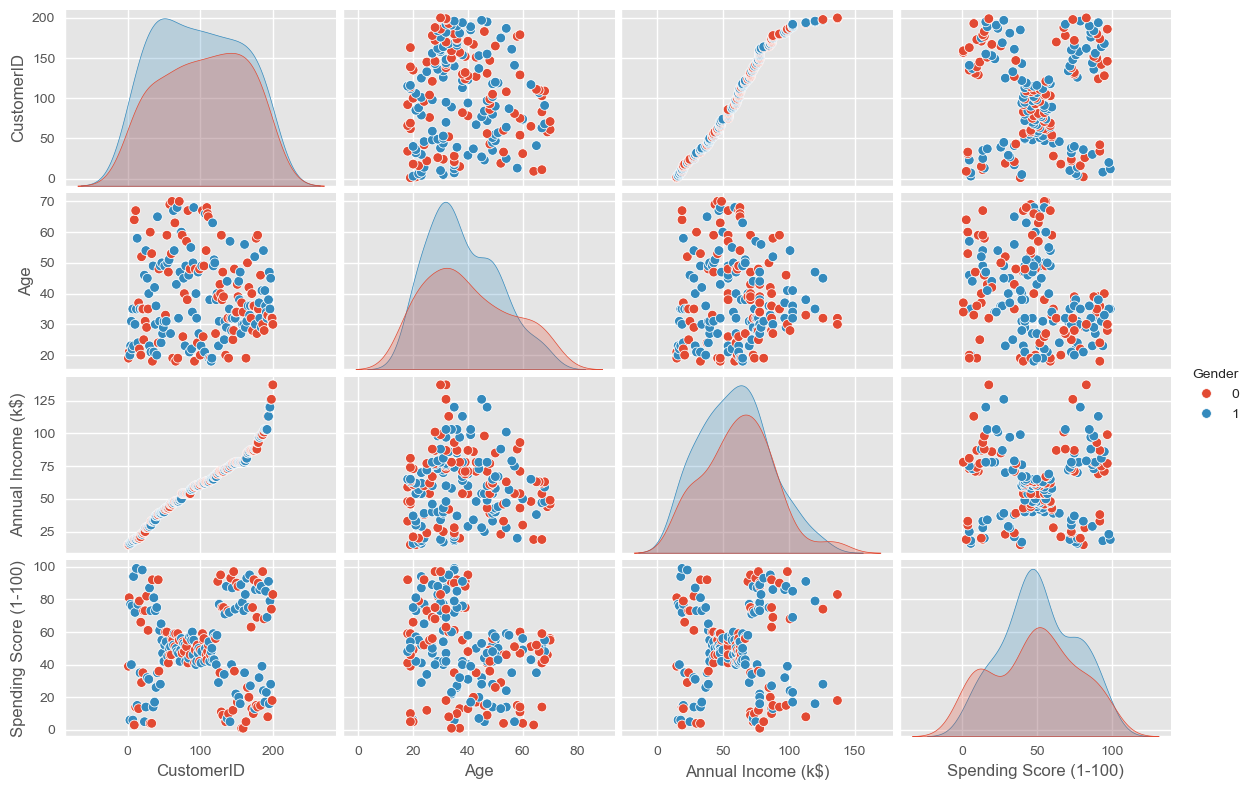

In [23]:
import seaborn as sns

# Select a subset of columns to plot
subset = df[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

# Create the pair plot with adjusted plot size
sns.pairplot(subset, hue='Gender', height=2, aspect=1.5)
plt.legend()
plt.show();


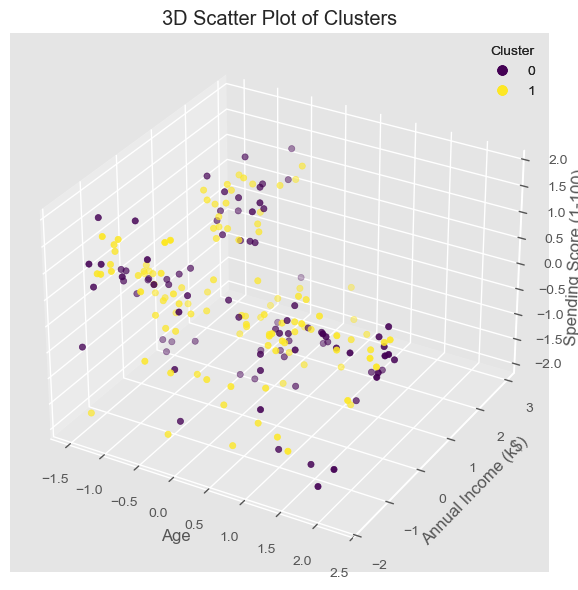

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot for Age, Annual Income (k$), and Spending Score (1-100)
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Gender'], cmap='viridis')

ax.set_title('3D Scatter Plot of Clusters')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.show();


This code creates a 3D scatter plot using Matplotlib to visualize clusters based on age, Annual Income (k$), and Spending Score (1-100). It sets titles and labels for the axes, colors the points by gender, and adds a legend to the plot.Finally, it displays the plot.

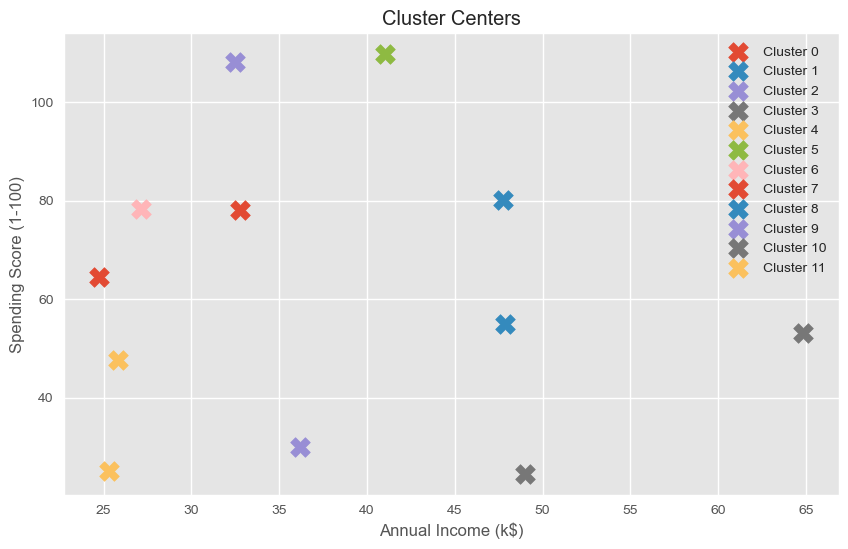

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'df' is your DataFrame and it has been preprocessed
# Select the features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Fit the KMeans model
kmeans = KMeans(n_clusters=12, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot cluster centers
plt.figure(figsize=(10, 6))
for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], label=f'Cluster {i}', s=200, marker='X')

plt.title('Cluster Centers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show();


We perform KMeans clustering to identify patterns and group similar data points together. This helps us understand the underlying structure of the data and make informed decisions. In this case, clustering customers based on age, Annual Income (k$), and Spending Score (1-100) can help businesses tailor their marketing strategies, improve customer segmentation, and enhance overall customer experience. By visualizing the cluster centers, we can easily see the characteristics of each group and target them more effectively.

#### Data Preprocessing

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handling Missing Values
df = df.dropna()  # Drop rows with missing values

# Encoding Categorical Variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Scaling Numerical Features
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


#### Data Splitting 

In [27]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Select the features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2)

print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')


Training set size: (160, 3)
Testing set size: (40, 3)


#### Training The Model...

In [28]:
# Fit the KMeans model
kmeans = KMeans(n_clusters=12, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=12, n_init=10, random_state=42)

#### Model Evaluation

**Silhouette Score**

- The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, with higher values indicating better clustering.

In [29]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_train, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3891332096292125


In [30]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Number of labels: {len(kmeans.labels_)}')
#Make sure to fit Kmeans on Training Data rather than entire dataset....

Shape of X_train: (160, 3)
Number of labels: 160


#### Within-Cluster Sum of Squares (WCSS)

- WCSS measures the sum of squared distances between each point and the centroid of its cluster. Lower values indicate better clustering.

In [31]:
# Calculate WCSS
wcss = kmeans.inertia_
print(f'WCSS: {wcss}')


WCSS: 55.25111846134604


### HyperParameter Tuning

**Elbow Method**
- The elbow method involves plotting the WCSS for different numbers of clusters and looking for an "elbow" point where the WCSS starts to decrease more slowly.

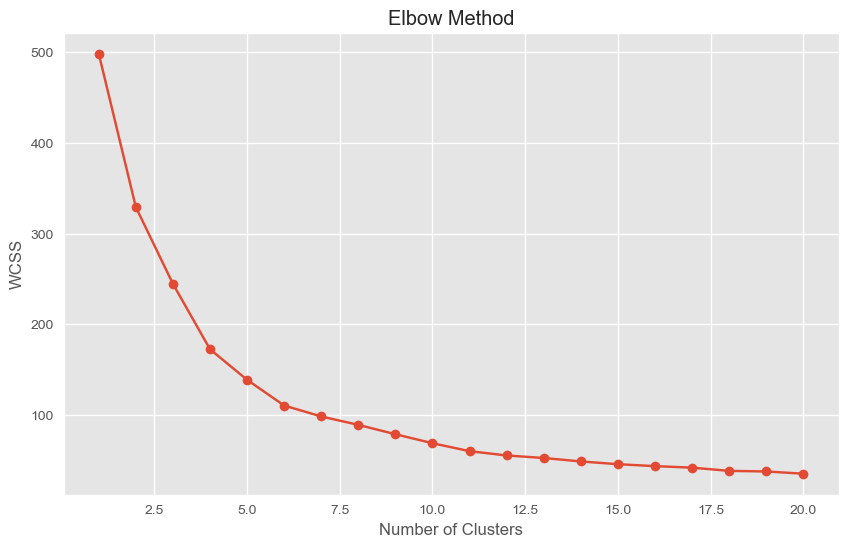

In [32]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show();


##### Let's try the DBSCAN algorithm, which can handle clusters of varying shapes and densities.

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Fit the DBSCAN model
dbscan = DBSCAN(eps=1.5,min_samples=20)
dbscan.fit(X_train)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_train, dbscan.labels_)
print(f'Silhouette Score (DBSCAN): {silhouette_avg}')

Silhouette Score (DBSCAN): 0.30743359342258525


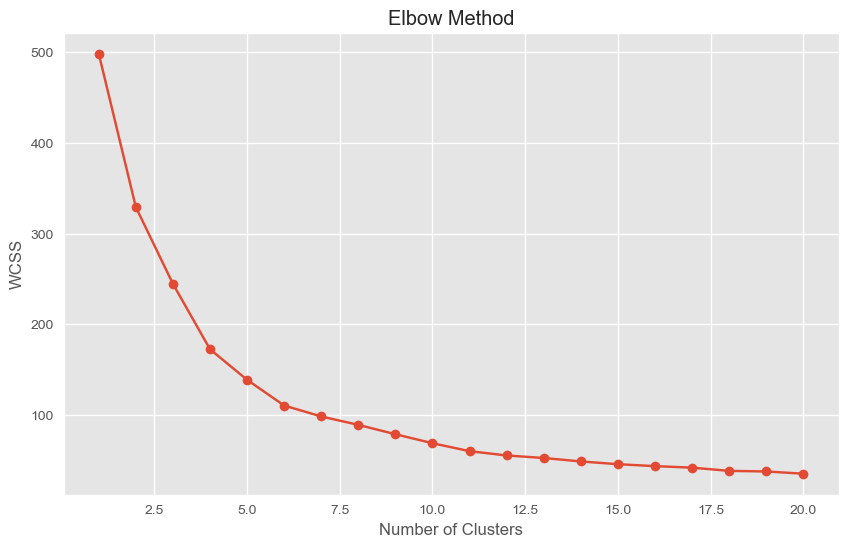

In [34]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show();


In [35]:
# Create new features
df['Income per Age'] = df['Annual Income (k$)'] / df['Age']
df['Spending per Income'] = df['Spending Score (1-100)'] / df['Annual Income (k$)']

# Select the features for clustering
X_new = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income per Age', 'Spending per Income']]

# Split the data into training and testing sets
X_train_new, X_test_new = train_test_split(X_new, test_size=0.2, random_state=42)

# Fit the KMeans model on the new features
kmeans_new = KMeans(n_clusters=12, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_new.fit(X_train_new)

# Calculate the silhouette score
silhouette_avg_new = silhouette_score(X_train_new, kmeans_new.labels_)
print(f'Silhouette Score (New Features): {silhouette_avg_new}')


Silhouette Score (New Features): 0.3652718120395133


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.cluster import KMeans

# Define the parameter grid
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Create a custom scorer
silhouette_scorer = make_scorer(silhouette_score)

# Perform grid search with the custom scorer
grid_search = GridSearchCV(KMeans(random_state=42), param_grid, cv=5, scoring=silhouette_scorer)
grid_search.fit(X_train_new)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Best parameters found:  {'n_clusters': 2}


In [37]:
from sklearn.metrics import adjusted_rand_score, v_measure_score, mutual_info_score
from sklearn.metrics import make_scorer

# Define custom scorers
adjusted_rand_scorer = make_scorer(adjusted_rand_score)
v_measure_scorer = make_scorer(v_measure_score)
mutual_info_scorer = make_scorer(mutual_info_score)

# Perform grid search with the custom scorers
grid_search_ars = GridSearchCV(KMeans(random_state=42), param_grid, cv=5, scoring=adjusted_rand_scorer)
grid_search_vms = GridSearchCV(KMeans(random_state=42), param_grid, cv=5, scoring=v_measure_scorer)
grid_search_mis = GridSearchCV(KMeans(random_state=42), param_grid, cv=5, scoring=mutual_info_scorer)

# Fit the models
grid_search_ars.fit(X_train_new)
grid_search_vms.fit(X_train_new)
grid_search_mis.fit(X_train_new)

# Get the best parameters
best_params_ars = grid_search_ars.best_params_
best_params_vms = grid_search_vms.best_params_
best_params_mis = grid_search_mis.best_params_

print(f'Best Parameters (Adjusted Rand Score): {best_params_ars}')
print(f'Best Parameters (V Measure Score): {best_params_vms}')
print(f'Best Parameters (Mutual Info Score): {best_params_mis}')


Best Parameters (Adjusted Rand Score): {'n_clusters': 2}
Best Parameters (V Measure Score): {'n_clusters': 2}
Best Parameters (Mutual Info Score): {'n_clusters': 2}
